# A Brief and Unnecessary Analysis of Mitch Hedberg Jokes

### ![](https://s-media-cache-ak0.pinimg.com/originals/28/d1/61/28d161e655dad5e85750fe685ef98370.jpg)




Mitch Hedberg has been a huge influence on my sense of humor. To me, his ability to drop hilarious one-liners was akin to Gary Larson's ability to convey layers of jokes within a one-frame comic. Earlier this week, I wondered whether Mitch's shorter jokes were funnier than his longer ones ("A burrito is a sleeping bag for beef," "My fake plants died because I did not pretend to water them," "A fly was almost called a land, because that's what it does half the time". When I found a Buzzfeed article titled, "A Complete Ranking Of (Almost) Every Single Mitch Hedberg Joke"\*, I went down the analytical rabbit hole. Below are some unnecessary findings from this unnecessary analysis.

_Enjoy?_

I'm mixing commentary with code in this notebook to explain my process a bit and provide context for my findings.

\* Link: https://www.buzzfeed.com/mrloganrhoades/a-complete-ranking-of-almost-every-single-mitch-hedberg-joke?utm_term=.mxdZzAdzV#.qoBD26m20

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# I didn't have the patience to webscrape. Copying and pasting into Excel would have to do...
mitch = pd.read_csv('MitchHedberg.csv', header=None)
mitch.head(3)

,0
0,275. I travel with a boom box. When I get on a...
1,274. Advil has a candy coating. It's delicious...
2,273. I had a job interview at an insurance com...


In [4]:
# Rename column
mitch.columns = ['Joke']

In [5]:
mitch.head(3)

,Joke
0,275. I travel with a boom box. When I get on a...
1,274. Advil has a candy coating. It's delicious...
2,273. I had a job interview at an insurance com...


In [7]:
# Return the length of each joke, subtracting one word to account for number at beginning
mitch_dict = {}
word_count = []
counter = 0
for i in range(len(mitch)):
    temp = mitch.ix[i,:][0].split(' ')
    if temp[-1] == '[Listen]':
        counter += 1
        temp = temp[0:-1]
    
    l = []
    for i in temp:
        l.append(i.lower().replace(".","").replace(",","").replace(" ","").replace("?","")\
                .replace("!","").replace('',"").replace('[Listen]',"").strip("'")\
                 .replace('fuckin','fucking'))
    
    word_count.append(len(temp) - 1)
    mitch_dict[l[0]] = l[1:]

In [8]:
# Create two columns for dataframe
mitch['Word_Count'] = word_count
mitch['Buzzfeed_Rank'] = np.arange(len(mitch),0,-1)

In [11]:
mitch.head()

,Joke,Word_Count,Buzzfeed_Rank
0,275. I travel with a boom box. When I get on a...,39,275
1,274. Advil has a candy coating. It's delicious...,30,274
2,273. I had a job interview at an insurance com...,35,273
3,"272. I fuckin' hate arrows, man. They try to t...",33,272
4,271. Acid was my favorite drug. Acid opened up...,32,271


# Distribution of word lengths
If we plot the distribution of joke lengths, below, we see that Mitch's jokes follow a gamma distribution, as seen in Graph A.

If we remove some of the longer jokes, which could arguably be considered outliers (since some may be considered a joke containing a number of shorter jokes), we see the following in Graph B.

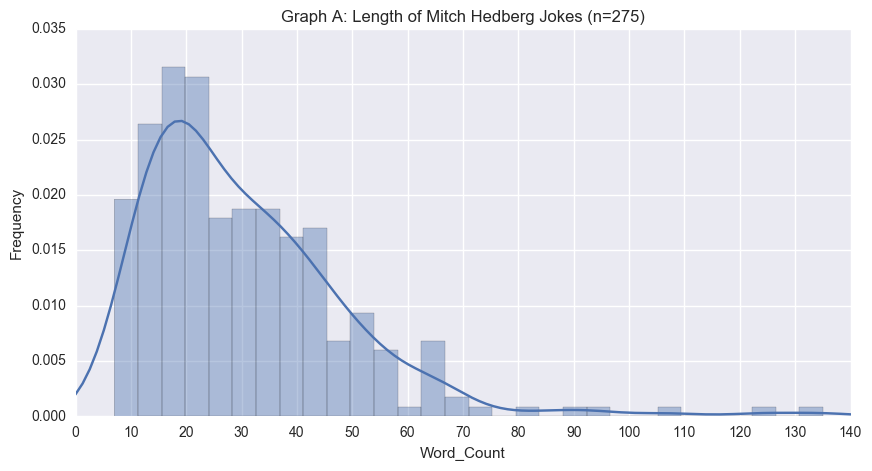

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title("Graph A: Length of Mitch Hedberg Jokes (n=275)")
ax.set_xlabel('Word Count')
ax.set_ylabel('Frequency')
plt.xlim((0,140))
plt.xticks(np.arange(0,150,10))
sns.distplot(mitch.Word_Count, kde=True, bins=30)

In [9]:
# Mean versus Median
print "Mean: {:.2f}".format(np.mean(mitch.Word_Count))
print "Median: {:.2f}".format(np.median(mitch.Word_Count))

Mean: 30.75
Median: 26.00


In [10]:
# Removing 'outliers' - any joke over 70 words (only nine!)
no_outliers = mitch[mitch["Word_Count"]<70]
no_outliers.shape

(267, 3)

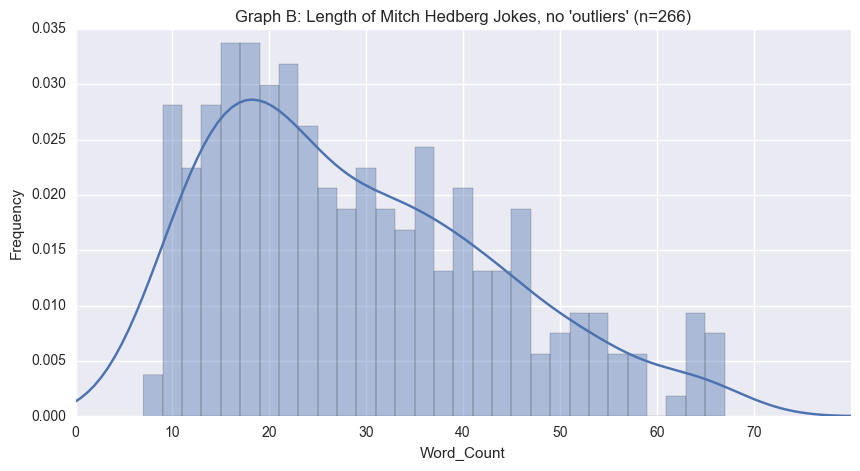

In [11]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title("Graph B: Length of Mitch Hedberg Jokes, no 'outliers' (n=266)")
ax.set_xlabel('Word Count')
ax.set_ylabel('Frequency')
plt.xlim((0,80))
plt.xticks(np.arange(0,80,10))
sns.distplot(no_outliers.Word_Count, bins=30)

In [12]:
# Mean versus Median
print "Mean: {:.2f}".format(np.mean(no_outliers.Word_Count))
print "Median: {:.2f}".format(np.median(no_outliers.Word_Count))

Mean: 28.77
Median: 25.00


# So what do these graphs mean?
** On average, it takes Mitch 25 or so words to reach his punchline. That's around the same number of words that I've written in these two sentences.**

The graphs also suggest that Mitch's repertoire is equipped with a range of joke lengths, allowing him to switch up the flow of his routine throughout the performance. By listening to some of his routines, you can certainly hear this. Visualizing the flow of his jokes over time would be interesting to see. The next time I'm bedridden for 48 hours, I'll put that together.

# So about that whole 'Is a shorter joke funnier?' thing
Well, that's kind of a hard thing to measure, once I really thought about it. My first thought was to listen to Mitch tell all of these jokes and time how amount of time people laughed at each joke. The problem with this approach is that Mitch tells a lot of jokes in rapid succession, so a particularly funny joke might be overshadowed or cut short by the joke before it or after, respectively. Another option would be to run this list of 275 jokes by people and ask them to rank the jokes, though I'm not sure my friends like me enough to do that.

Ultimately, I stuck with the ratings provided to us by Logan over at Buzzfeed - thanks again, Logan.

Graph C below plots word count of each joke versus its Buzzfeed ranking. As we see in the distributions in Graphs A and B, the points tend to stick towards the lower end of the spectrum, lengthwise. This distribution appears to be relatively consistent throughout the rankings.

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


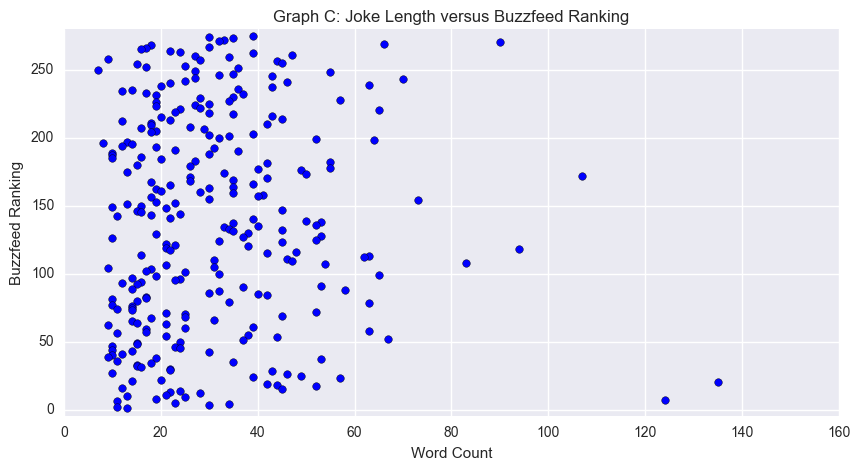

In [14]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title("Graph C: Joke Length versus Buzzfeed Ranking")
ax.set_xlabel('Word Count')
ax.set_ylabel('Buzzfeed Ranking')
ax.set_ylim(bottom=-5, top=280)
plt.legend(loc='best',
           ncol=3,
           fontsize=8)
plt.scatter(mitch.Word_Count, mitch.Buzzfeed_Rank, cmap='Blues', s=30)


## That said...
There is a *slight* skew of shorter jokes ranked higher, namely in the top 100, as seen in Jointplot A, which graphs joke length against Buzzfeed rankings for only jokes of less than 26 words (population median). Look at the histogram on the righthand side of the joint plot to see this skew. If we look at the same graph but for jokes of equal to or greater than 26 words, in Jointplot B, we see a *slightly* higher skew towards longer jokes.

### Jointplot A

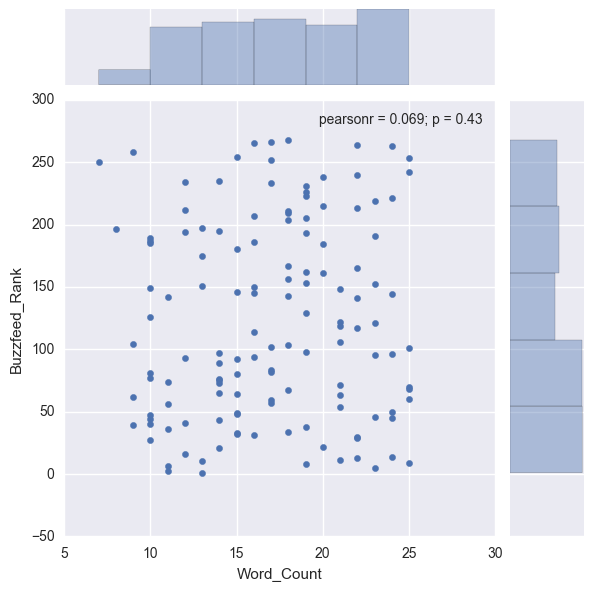

In [15]:
# Jointplot comparing Buzzfeed ranking with word count only for jokes with less than 26 words (population median).
sns.jointplot(x=mitch[mitch['Word_Count']<26]['Word_Count'], y=mitch[mitch['Word_Count']<26]['Buzzfeed_Rank'])

### Jointplot B

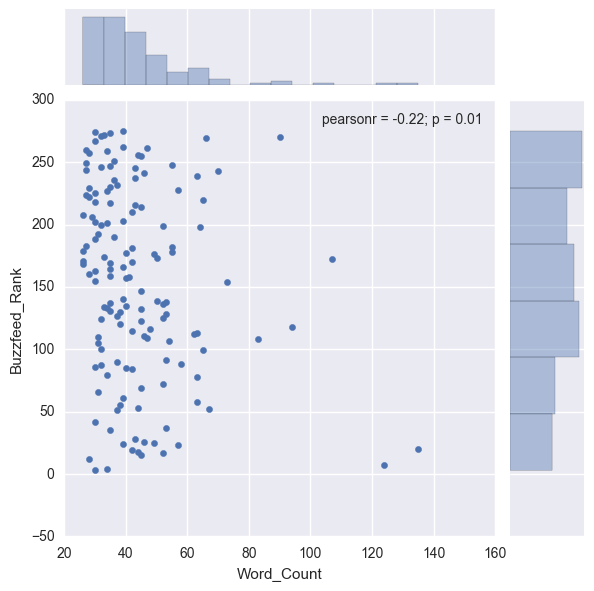

In [16]:
# Jointplot comparing Buzzfeed ranking with word count only for jokes with greater than or equal to
# 26 words (population median).
sns.jointplot(x=mitch[mitch['Word_Count']>=26]['Word_Count'], y=mitch[mitch['Word_Count']>=26]['Buzzfeed_Rank'])

# "I type 101 words a minute, but it’s in my own language."
Aside from joke length versus hilarity, I became curious as to whether any neat insight could be gleaned from analyzing Mitch's vocabulary. The code below does a quick removal of very common words ("stopwords") and then "stems" words to their core value so that words like "walking" and "walk" are equivalent to each other.

Some really exciting stuff after the code...

In [17]:
all_jokes = []
for i in mitch_dict.keys():
    for x in mitch_dict[i]:
            all_jokes.append(x)

In [18]:
from nltk.corpus import stopwords
stop_jokes = []     # To capture words we're removing from dataset
filtered_jokes = [] # To capture words we're keeping in dataset
stop = stopwords.words('english')
for word in all_jokes:
    if word not in stop:
        filtered_jokes.append(word)
    else:
        stop_jokes.append(word)

In [19]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_filtered_list = [stemmer.stem(word) for word in filtered_jokes]
print "Testing how the stemmer works: {}".format(stemmed_filtered_list[0:10])

Testing how the stemmer works: [u'hate', u'sandwich', u'new', u'york', u'deli', u'much', u'fuck', u'meat', u'sandwich', u"it'"]


In [20]:
from collections import Counter
count_stems_df = pd.DataFrame(Counter(stemmed_filtered_list),\
                              index=["Count"]).T.sort_values('Count', ascending=False)

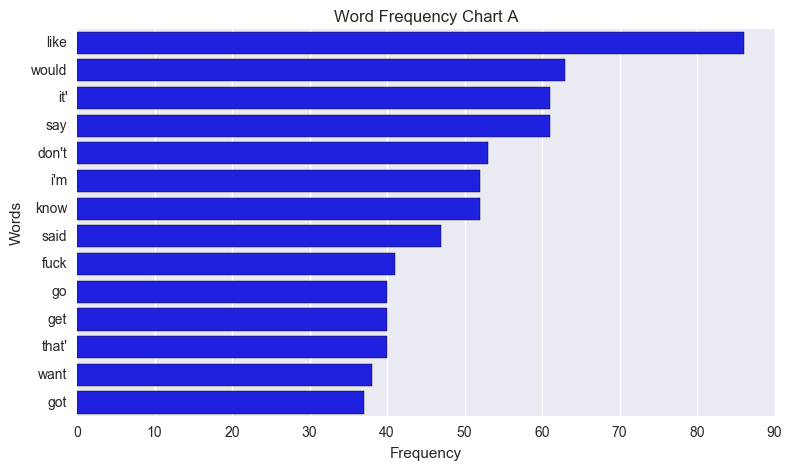

In [21]:
plot_dataA = count_stems_df[count_stems_df['Count']>35]
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
sns.barplot(x='Count', y=plot_dataA.index, data=plot_dataA, color="b")
ax.set_title('Word Frequency Chart A', size=12)
ax.set_xlabel('Frequency')
ax.set_ylabel('Words');

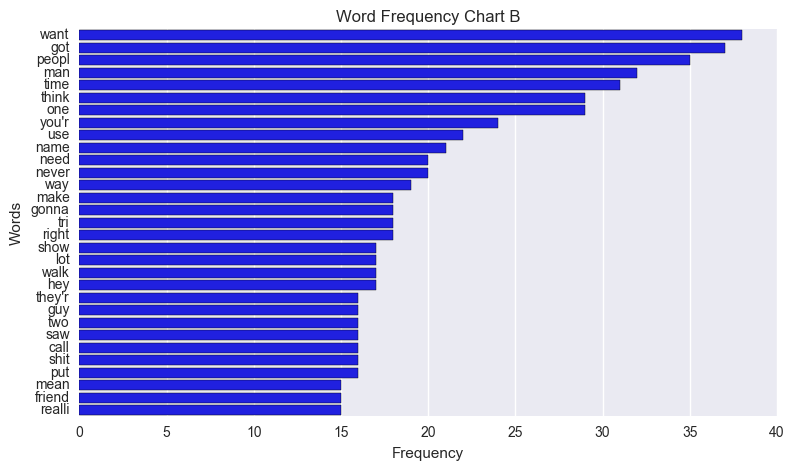

In [22]:
plot_dataB = count_stems_df[count_stems_df['Count']>=15]
plot_dataB = plot_dataB[plot_dataB['Count']<40]
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
sns.barplot(x='Count', y=plot_dataB.index, data=plot_dataB, color="b")
ax.set_title('Word Frequency Chart B', size=12)
ax.set_xlabel('Frequency')
ax.set_ylabel('Words');

In [23]:
TableC = pd.DataFrame()
for i in range(5,-1,-1):
    TableC['Word frequency: {}'.format(i+1)] = count_stems_df[count_stems_df['Count']==i+1]\
                                       .head(10).index

print 'Table C:'
TableC

Table C:


,Word frequency: 6,Word frequency: 5,Word frequency: 4,Word frequency: 3,Word frequency: 2,Word frequency: 1
0,somebodi,seem,cigar,miss,hut,boat
1,spell,bear,clean,movi,itali,burbank
2,question,four,drunk,dog,jack,blurri
3,product,next,chang,move,tank,burrito
4,fire,tast,fan,turn,shredder,bother
5,guess,suck,wanna,true,win,blood
6,hang,direct,run,metal,school,stock
7,hate,letter,corn,arrow,jackpot,blender
8,funni,sit,mcdonald',appl,scholl,slept
9,help,money,regular,dream,shot,blanket


# Some NLP reflections

The above graphs first off show that several common words still made it through our stopwords filter, such as "I", "me", "and", "the", etc. This is particularly true in Graph A, aside from a notable swear word\*. To see whether there were some more nuanced wored, I looked at a more central chunk of the word counts in Graph B. Looking at these words in this graph give us a little more insight into Mitch's word choice.

Most notably, Graph B features some solid examples of what I'll call "slacker talk": people, man, gonna, hey, guy, shit, time (followed by one... so, we could probably combine this to be "one time"), etc. These are common words that Mitch uses throughout the delivery of many of his jokes, which in turn give us some insight into the style of his delivery. It's laidback, riddled with swear words (see further below) that replace more eloquent descriptors.

If Graph B provides the context for Mitch's delivery of jokes, then the lesser-used words provide more of the specific topics that he covers: restaurants, food, inanimate objects, travel, etc. There are too many of these words to put in a graph, so I made a table of some of these words, above.

\*_A quick note about "fuck": I noticed that variations of this swear word made it through a stemmer in our code. The stemmer is supposed to truncate words into their root form - for example, "standing" will become "stand", "fucking" will become "fuck". However, the spelling of the word "fucking" in the incoming dataset was spelled "fuckin" - which, granted, totally represents Mitch's pronunciation of it - and the stemmer did not recognize this to have the same root as "fuck". So, I manually replaced "fuckin" with "fucking" when cleaning up the fucking data._

## Sidenote: If you wondered how frequently Mitch's swearing shows up in the distribution of data...
Mitch swears a lot (in part a symptom this 'slacker' talk he exhibits). But just how often do his jokes contain swear words?

About 23 percent of his jokes contain at least one swear word, and these jokes appear to be pretty evenly distributed across all joke lengths and rankings.



In [24]:
swear_list = []
for i in mitch.Joke:
    if 'fuck'in i:
        swear_list.append(1)
    elif 'shit' in i:
        swear_list.append(1)
    elif 'ass' in i:
        swear_list.append(1)
    elif 'damn' in i:
        swear_list.append(1)
    else:
        swear_list.append(0)
        
mitch['swear_words'] = swear_list
print "Percent of jokes that have at least one swear word: {:.2f}%".format(100*float(sum(swear_list))/len(mitch.Joke))

Percent of jokes that have at least one swear word: 23.27%


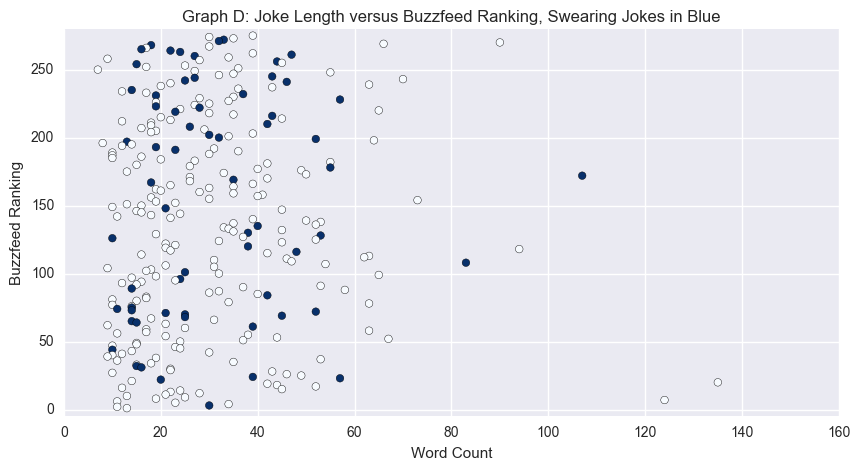

In [25]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title("Graph D: Joke Length versus Buzzfeed Ranking, Swearing Jokes in Blue")
ax.set_xlabel('Word Count')
ax.set_ylabel('Buzzfeed Ranking')
ax.set_ylim(bottom=-5, top=280)
plt.scatter(mitch.Word_Count, mitch.Buzzfeed_Rank, c=mitch['swear_words'], cmap='Blues', s=30)

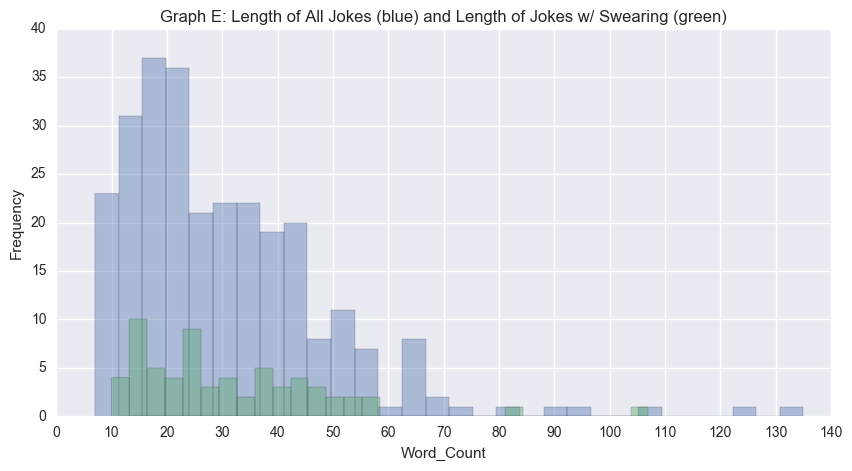

In [27]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title("Graph E: Length of All Jokes (blue) and Length of Jokes w/ Swearing (green)")
ax.set_xlabel('Word Count')
ax.set_ylabel('Frequency')
plt.xlim((0,140))
plt.xticks(np.arange(0,150,10))
sns.distplot(mitch.Word_Count, kde=False, bins=30)
sns.distplot(mitch[mitch['swear_words']==1]['Word_Count'], kde=False, bins=30)

# Challenges, room for improvement
- Using NLP on "Mitch-speak" is requires a fair amount of cleaning if we want to do some deeper analysis of his language, more than what I've done here.
- There are jokes of Mitch's that are not included the dataset. For example: "I have a vest. If I had my arms cut off, it would be a jacket." That's a doozy, and it's not in the dataset (get it together, Buzzfeed).
- Multi-joke jokes: How do we deal with them? For example, "I like escalators, because an escalator can never break; it can only become stairs. There would never be an 'Escalator Temporarily Out of Order' sign. Only an 'Escalator Temporarily Stairs… Sorry for the Convenience.'" This could be categorized as two jokes in one, or one main joke and then a follow-on. Either way, this could make some of the longer jokes appear longer than what is reflected by their delivery in a performance. Similarly, some of the shorter jokes may have been pulled out of a longer joke.
- It would be interesting to group the 275 jokes into categories and see how distributions of joke length and rankings compare across groups.

Ultimately, we could probably have just taken this entire question to a restaurant, where the customer is always right.